In [1]:
import pandas as pd
import numpy as np


In [2]:
df_LosA = pd.read_csv('carlist_losA.csv', header = None, names = range(10))
df_Chicago = pd.read_csv('carlist_chicago.csv', header = None, names = range(10))
df_NewYork = pd.read_csv('carlist_newYork.csv', header = None, names = range(10))


cars_los = pd.DataFrame([])
cars_chi = pd.DataFrame([])
cars_new = pd.DataFrame([])



In [3]:
def clean_price(df, new_df):
    container = []
    for i in range(len(df)):
        container.append((df[0][i]))
    new_df['Price'] = container
    pass

def clean_miles(df, new_df):
    container = []
    for i in range(len(df)):
        container.append((df[8][i]))
    new_df['Miles'] = container
    pass

In [4]:
def what_year(df,new_df):
    container = []
    for i in range(len(df)):
        container.append(((df[3][i])))
    new_df['Year'] = container
    pass

def what_state(df, new_df):
    container = []
    for i in range(len(df)):
        container.append((df[6][i]))
    new_df['Zipcode'] = container
    pass

def car_make(df,new_df):
    container = []
    for i in range(len(df)):
        make = df[1][i]
        container.append(make)
    new_df["Make"] = container
    pass

def car_model(df,new_df):
    container = []
    for i in range(len(df)):
        model = df[2][i]
        container.append((model))
    new_df['Model'] = container
    pass

def city_in(df, new_df, city):
    container = []
    for i in range(len(df)):
        container.append((city))
    new_df['City'] = container
    pass
def bodyz(df, new_df):
    container = []
    for i in range(len(df)):
        container.append(df[4][i])
    new_df['Body'] = container
    pass

In [5]:
def super_clean(df, new_df, city):
    #clean_miles(df, new_df)
    clean_price(df, new_df)
    what_year(df, new_df)
    car_make(df,new_df)
    car_model(df, new_df)
    bodyz(df,new_df)
    city_in(df, new_df, city)
    pass

In [6]:
#cars.dropna(inplace=True)
#cars = cars.drop_duplicates()
#print(cars_los.head())

In [7]:
super_clean(df_LosA, cars_los,'Los Angels')
super_clean(df_Chicago, cars_chi,'Chicago')
super_clean(df_NewYork, cars_new, "New York")

In [8]:
print(cars_new.head())

     Price  Year      Make    Model   Body      City
0  15995.0  2017    Nissan   Altima  Sedan  New York
1  11990.0  2017   Hyundai   Sonata  Sedan  New York
2   9995.0  2015  Chrysler      200  Sedan  New York
3  14299.0  2017     Acura      ILX  Sedan  New York
4   5900.0  2013       GMC  Terrain    SUV  New York


In [9]:
all_data = pd.concat([cars_los, cars_chi, cars_new], axis=0, join='outer', sort=True)

In [10]:
len(all_data)

620997

In [11]:
print(len(all_data))
no_dups = all_data.drop_duplicates()
no_nan = no_dups.dropna()
print(len(no_dups))
print(len(no_nan))

620997
11801
11707


In [122]:
no_nan.head()


,Body,City,Make,Model,Price,Year
0,Wagon,Los Angels,Chevrolet,Bolt EV,28287.0,2020
1,SUV,Los Angels,Nissan,Kicks,20025.0,2020
2,SUV,Los Angels,Nissan,Kicks,19630.0,2020
4,Sedan,Los Angels,Nissan,Versa,14834.0,2020
5,Sedan,Los Angels,Nissan,Versa,18106.0,2020


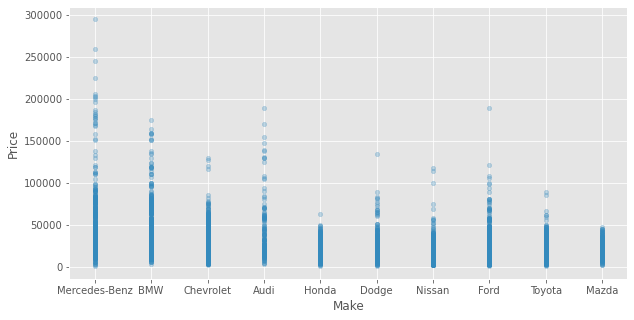

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df_mazda = no_nan[no_nan['Make'] == 'Mazda']
df_mercedes = no_nan[no_nan['Make'] == 'Mercedes-Benz']
df_bmw =no_nan[no_nan['Make'] == 'BMW']
df_toyota =no_nan[no_nan['Make'] == 'Toyota']
df_ford = no_nan[no_nan['Make'] == 'Ford']
df_nissian = no_nan[no_nan['Make'] == 'Nissan']
df_dodge= no_nan[no_nan['Make'] == 'Dodge']
df_honda = no_nan[no_nan['Make'] == 'Honda']
df_audi = no_nan[no_nan['Make'] == 'Audi']
df_chevy = no_nan[no_nan['Make'] == 'Chevrolet']
top_ten = pd.concat([df_mercedes,df_bmw,df_chevy,df_audi,df_honda,df_dodge,df_nissian,df_ford,df_toyota,df_mazda])

#plt.ylim(0, 10)
top_ten.plot.scatter(x = 'Make',y=('Price'), figsize=(10,5), alpha=.3)
plt.savefig('top_ten.png')

In [133]:
print(len(df_mazda))
print(len(df_toyota))
print(len(df_bmw))
print(len(df_mercedes))

common = pd.concat([df_mazda,df_toyota])
lux = pd.concat([df_mercedes,df_bmw])

322
464
478
411


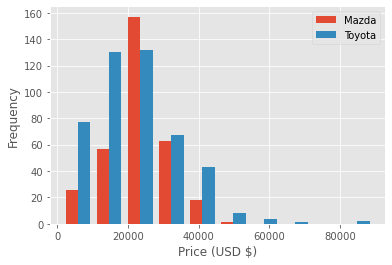

In [129]:
fig, ax1 = plt.subplots()
ax1.hist([df_mazda['Price'],df_toyota['Price']], label = ['Mazda', 'Toyota'], bins=10)
ax1.legend(loc='upper right')
ax1.set_xlabel('Price (USD $)')
ax1.set_ylabel('Frequency')


plt.savefig('mazda_toyota.png')
plt.show()

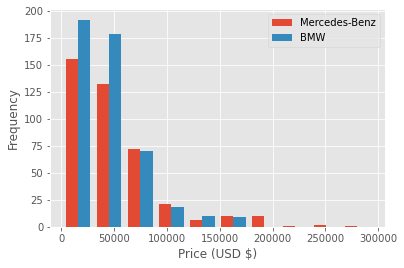

In [130]:
fig, ax1 = plt.subplots()
ax1.hist([df_mercedes['Price'],df_bmw['Price']], label = ['Mercedes-Benz', 'BMW'], bins=10)
ax1.legend(loc='upper right')
ax1.set_xlabel('Price (USD $)')
ax1.set_ylabel('Frequency')
#ax1.set_xlim(0,100000)

plt.savefig('bmw_mercedes2.png')
plt.show()

Ttest_indResult(statistic=-1.8567920000494806, pvalue=0.06371564543031194)


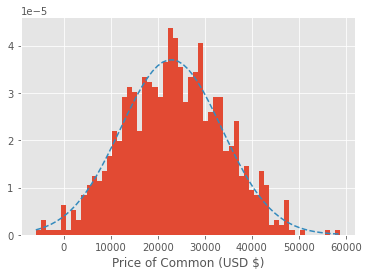

In [140]:
import scipy.stats as stats

common_mean = common['Price'].mean()
common_std = common['Price'].std()
x = common_mean + common_std * np.random.randn(889)
bins = 60
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, bins, density=1)

y = ((1 / (np.sqrt(2 * np.pi) * common_std)) *
     np.exp(-0.5 * (1 / common_std * (bins - common_mean))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Price of Common (USD $)')

#t test for mazada mean vs toyota
print(stats.ttest_ind(df_toyota['Price'],df_mazda['Price']))
plt.savefig('normal_using_common.png')

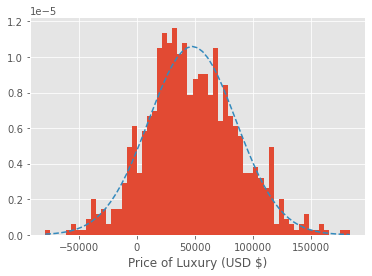

In [141]:
lux_mean = lux['Price'].mean()
lux_std = lux['Price'].std()
x = lux_mean + lux_std * np.random.randn(786)
bins = 60
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, bins, density=1)

y = ((1 / (np.sqrt(2 * np.pi) * lux_std)) *
     np.exp(-0.5 * (1 / lux_std * (bins - lux_mean))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Price of Luxury (USD $)')
plt.savefig('normal_using_lux.png')

In [107]:
# I'm under the impression that the price of one car effects the price of another
print(stats.ttest_ind(df_bmw['Price'],df_mercedes['Price']))
print(stats.ttest_ind(df_bmw['Price'],df_mazda['Price']))


Ttest_indResult(statistic=-3.414422727589426, pvalue=0.0006681525117998042)
Ttest_indResult(statistic=11.636175367667198, pvalue=5.115396197611314e-29)
